<a href="https://colab.research.google.com/github/evelynda1985/DataScience/blob/master/sklearnDummiesAndVIFExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - Dummies and VIF

Please run all the cells below and find the exercise at the bottom of the notebook.

## Importing the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [1]:
import google.colab
google.colab.files.upload()

Saving 1.04.Real-lifeExample.csv to 1.04.Real-lifeExample.csv


{'1.04.Real-lifeExample.csv': b'\xef\xbb\xbfBrand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model\r\nBMW,4200,sedan,277,2,Petrol,yes,1991,320\r\nMercedes-Benz,7900,van,427,2.9,Diesel,yes,1999,Sprinter 212\r\nMercedes-Benz,13300,sedan,358,5,Gas,yes,2003,S 500\r\nAudi,23000,crossover,240,4.2,Petrol,yes,2007,Q7\r\nToyota,18300,crossover,120,2,Petrol,yes,2011,Rav 4\r\nMercedes-Benz,199999,crossover,0,5.5,Petrol,yes,2016,GLS 63\r\nBMW,6100,sedan,438,2,Gas,yes,1997,320\r\nAudi,14200,vagon,200,2.7,Diesel,yes,2006,A6\r\nRenault,10799,vagon,193,1.5,Diesel,yes,2012,Megane\r\nVolkswagen,1400,other,212,1.8,Gas,no,1999,Golf IV\r\nRenault,11950,vagon,177,1.5,Diesel,yes,2011,Megane\r\nRenault,2500,sedan,260,1.79,Petrol,yes,1994,19\r\nAudi,9500,vagon,165,2.7,Gas,yes,2003,A6 Allroad\r\nVolkswagen,10500,sedan,100,1.8,Petrol,yes,2008,Passat B6\r\nToyota,16000,crossover,250,4.7,Gas,yes,2001,Land Cruiser 100\r\nRenault,8600,hatch,84,1.5,Diesel,yes,2012,Clio\r\nBMW,2990,other,203,2,Petrol,no,

In [4]:
raw_data = pd.read_csv('1.04.Real-lifeExample.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [5]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [6]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [7]:
data.isnull().sum()

,0
Brand,0
Price,172
Body,0
Mileage,0
EngineV,150
Engine Type,0
Registration,0
Year,0


In [8]:
data_no_mv = data.dropna(axis=0)

In [9]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

/tmp/ipython-input-216991009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

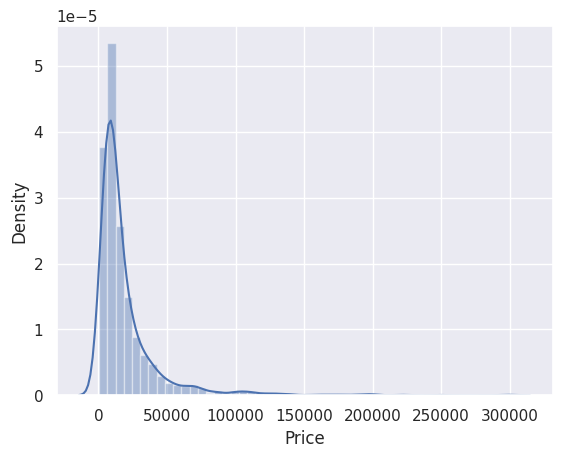

In [10]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [11]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/tmp/ipython-input-2589761964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

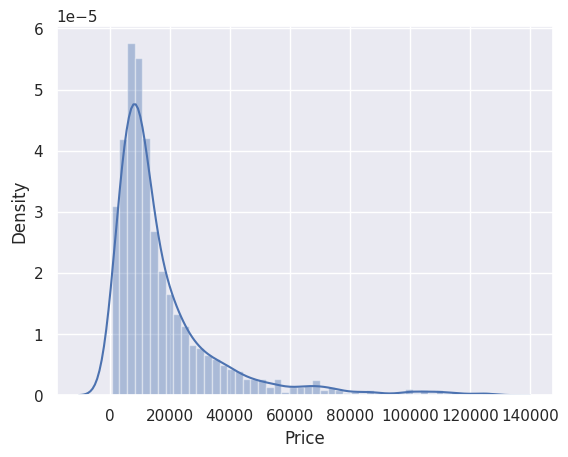

In [12]:
sns.distplot(data_1['Price'])

/tmp/ipython-input-534165355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

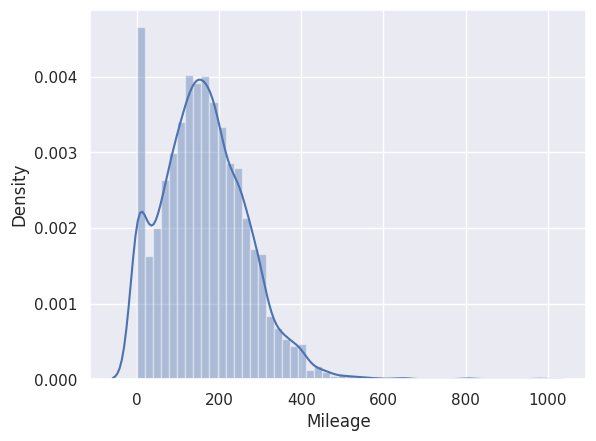

In [13]:
sns.distplot(data_no_mv['Mileage'])

In [14]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

/tmp/ipython-input-1950307955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

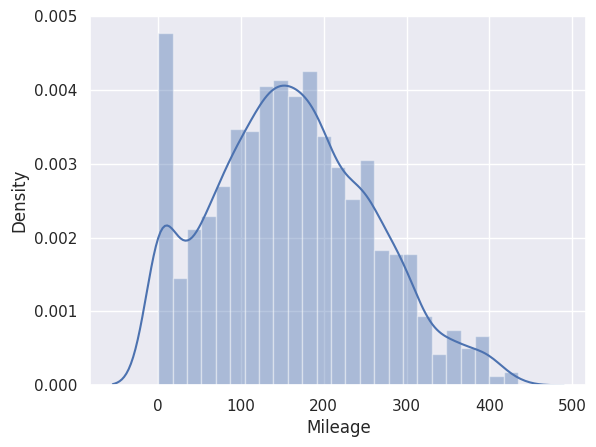

In [15]:
sns.distplot(data_2['Mileage'])

/tmp/ipython-input-823394628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

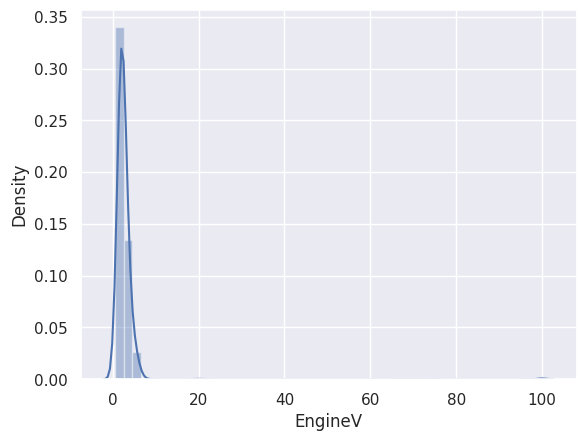

In [16]:
sns.distplot(data_no_mv['EngineV'])

In [17]:
data_3 = data_2[data_2['EngineV']<6.5]

/tmp/ipython-input-1902427236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

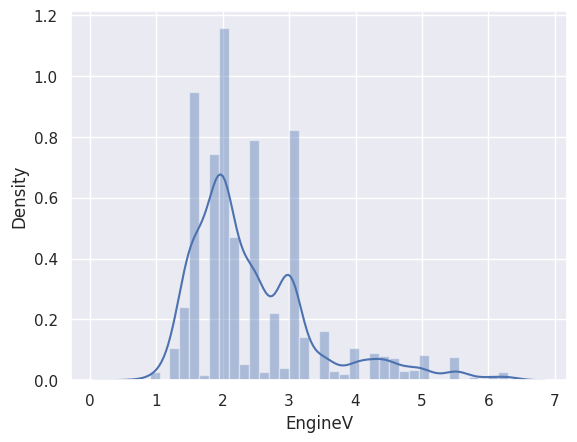

In [18]:
sns.distplot(data_3['EngineV'])

/tmp/ipython-input-534082538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Year'])


<Axes: xlabel='Year', ylabel='Density'>

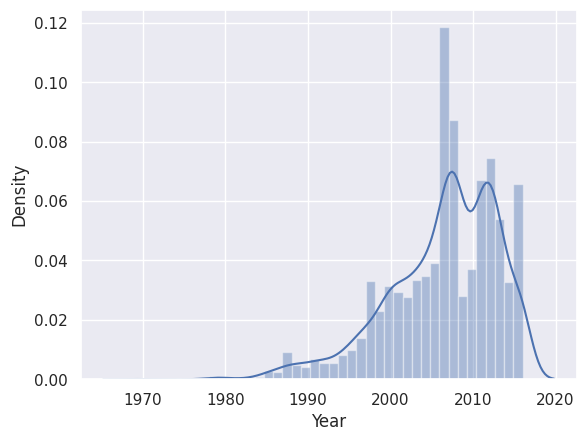

In [19]:
sns.distplot(data_no_mv['Year'])

In [20]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

/tmp/ipython-input-2748958191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

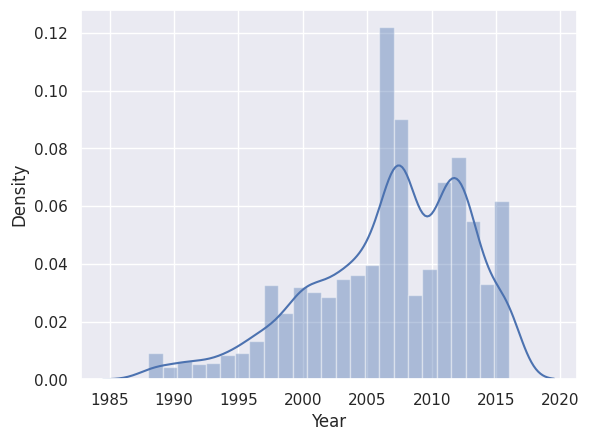

In [21]:
sns.distplot(data_4['Year'])

In [22]:
data_cleaned = data_4.reset_index(drop=True)

In [23]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

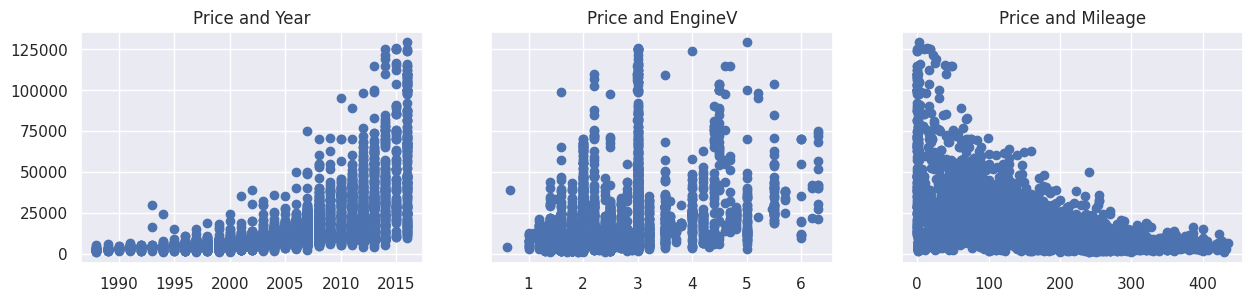

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

/tmp/ipython-input-462586877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


<Axes: xlabel='Price', ylabel='Density'>

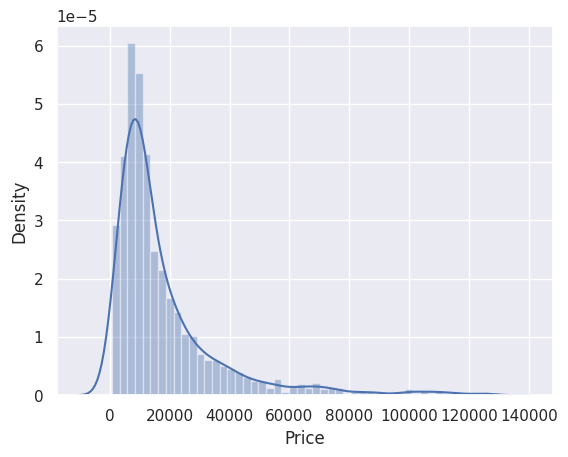

In [25]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [26]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


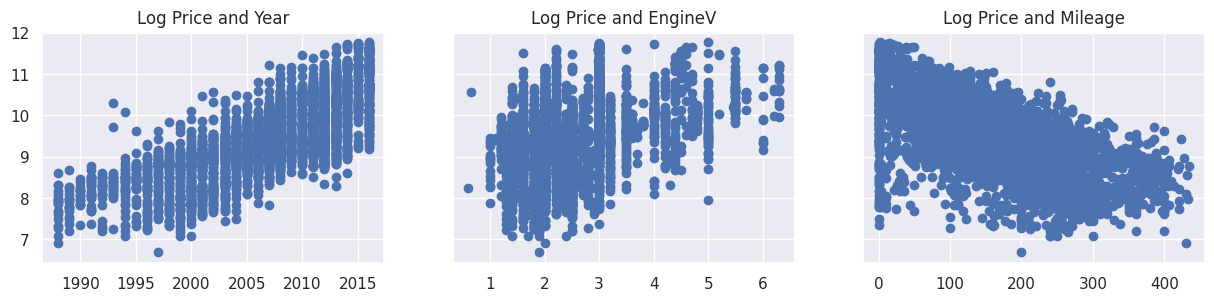

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [28]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [29]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [31]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [32]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [40]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True).astype(int)

In [41]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2,8,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2,8,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5,9,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2,9,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [42]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [43]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [44]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8,277,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8,427,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9,358,5,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10,240,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9,120,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


***

***

***

# EXERCISE

### Part 1
Calculate the variance inflation factors for all variables contained in data_preprocessed. Anything strange?

### Part 2
As mentioned in the lecture, your task is to calculate the variance inflation factor (VIF) of all variables including the dummies (but without the dependent variable).

### Part 3
Now calculate the VIFs for a data frame where we include the dummies, without 'log_price', but DO NOT DROP THE FIRST DUMMY. Anything strange now?

In [53]:
#Part 1
#without the first dummy column
cols_to_use = [i for i in range(data_preprocessed.shape[1]) if i != 3]
vif = pd.DataFrame()
vif["feature"] = data_preprocessed.columns[cols_to_use]
vif["VIF"] = [variance_inflation_factor(data_preprocessed.values, i) for i in cols_to_use]

vif

,feature,VIF
0,log_price,36.216259
1,Mileage,4.329869
2,EngineV,9.201656
3,Brand_Mercedes-Benz,3.058590
4,Brand_Mitsubishi,1.812116
5,Brand_Renault,2.283204
6,Brand_Toyota,2.401559
7,Brand_Volkswagen,3.308884
8,Body_hatch,1.590091
9,Body_other,1.608168


In [46]:
#log_price has a very high IVF and registration-year, I'll say we can drop registration_year.
#log_price value indicates that is mostly linearly correlated with the other variables
#but we must to drop that variable

In [69]:
#Part 2
variables = data_preprocessed.drop(['log_price'],axis=1)
vif = pd.DataFrame()
vif["feature"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif

,feature,VIF
0,Mileage,4.327132
1,EngineV,5.992149
2,Brand_BMW,2.304235
3,Brand_Mercedes-Benz,2.837933
4,Brand_Mitsubishi,1.635908
5,Brand_Renault,2.085437
6,Brand_Toyota,2.120646
7,Brand_Volkswagen,2.817933
8,Body_hatch,1.480580
9,Body_other,1.540293


In [ ]:
# registration and engineV are very high,
#registration_yes can be drop most of the values are just "yes"

In [83]:
#Part 3
vif_no_dependent_var = pd.get_dummies(data_no_multicollinearity, drop_first=True).astype(int)

vif_no_dependent_var.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2,8,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2,8,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5,9,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2,9,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [85]:

vif_no_dependent_var = pd.DataFrame()
vif_no_dependent_var['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif_no_dependent_var['feature'] = variables.columns

vif_no_dependent_var

,VIF,feature
0,4.327132,Mileage
1,5.992149,EngineV
2,2.304235,Brand_BMW
3,2.837933,Brand_Mercedes-Benz
4,1.635908,Brand_Mitsubishi
5,2.085437,Brand_Renault
6,2.120646,Brand_Toyota
7,2.817933,Brand_Volkswagen
8,1.480580,Body_hatch
9,1.540293,Body_other
